In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
random_seed = 1
torch.manual_seed(random_seed)

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class Block(nn.Module):
    '''Depthwise conv + Pointwise conv'''
    def __init__(self, in_planes, out_planes, stride=1):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d("""???""", """???""", kernel_size=, stride=, padding=, groups=in_planes, bias=False) # groups = @ : @ channel will be one group
        self.bn1 = nn.BatchNorm2d("""???""")
        self.conv2 = nn.Conv2d("""???""", out_planes, kernel_size=, stride=, padding=, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)

    def forward(self, x):
        out = 
        out = 
        return out

In [5]:
class MobileNet(nn.Module):
    # (128,2) means conv planes=128, conv stride=2, by default conv stride=1
    cfg = [64, (128,2), 128, (256,2), 256, (512,2), 512, 512, 512, 512, 512, (1024,2), 1024]

    def __init__(self, num_classes=10):
        super(MobileNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)

        self.layers = self._make_layers(in_planes=32)
        self.linear = nn.Linear("""???""", num_classes)

    def _make_layers(self, in_planes):
        layers = []
        for x in self.cfg:
            """Fill this blank"""
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layers(out)
        out = F.avg_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import time

In [7]:
net = MobileNet()
net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr="""???""", momentum=0.9)
step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=["""???"""], gamma = """???""")

In [8]:
def train(epoch):
    net.train()
    running_loss = 0 
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if batch_idx % 30 ==29:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(net.state_dict(), './MobileNet_model.pth')
            torch.save(optimizer.state_dict(), './MobileNet_optimizer.pth')


In [9]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader):
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss.item()
    test_losses.append(test_loss/(batch_idx+1))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss/(batch_idx+1), correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    accuracy.append(100. * correct / len(test_loader.dataset))

In [10]:
epochs = 50
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
accuracy = []

In [11]:
test()
epochs = 50
since = time.time()
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
    step_lr_scheduler.step()
finish = time.time()
print('Training Finished in {}min'.format((finish - since)//60))


Test set: Avg. loss: 2.3027, Accuracy: 1000/10000 (10%)

Train Epoch: 1 [58/50000 (7%)]	Loss: 2.137208
Train Epoch: 1 [118/50000 (15%)]	Loss: 1.818326
Train Epoch: 1 [178/50000 (23%)]	Loss: 1.817491
Train Epoch: 1 [238/50000 (30%)]	Loss: 1.680421
Train Epoch: 1 [298/50000 (38%)]	Loss: 1.654222
Train Epoch: 1 [358/50000 (46%)]	Loss: 1.514055
Train Epoch: 1 [418/50000 (53%)]	Loss: 1.455733
Train Epoch: 1 [478/50000 (61%)]	Loss: 1.482354
Train Epoch: 1 [538/50000 (69%)]	Loss: 1.379504
Train Epoch: 1 [598/50000 (76%)]	Loss: 1.392567
Train Epoch: 1 [658/50000 (84%)]	Loss: 1.185435
Train Epoch: 1 [718/50000 (92%)]	Loss: 1.163393
Train Epoch: 1 [778/50000 (99%)]	Loss: 1.207471

Test set: Avg. loss: 1.4722, Accuracy: 4894/10000 (49%)

Train Epoch: 2 [58/50000 (7%)]	Loss: 1.300971
Train Epoch: 2 [118/50000 (15%)]	Loss: 1.386666
Train Epoch: 2 [178/50000 (23%)]	Loss: 1.235131
Train Epoch: 2 [238/50000 (30%)]	Loss: 0.919004
Train Epoch: 2 [298/50000 (38%)]	Loss: 1.192073
Train Epoch: 2 [358/5000

[]

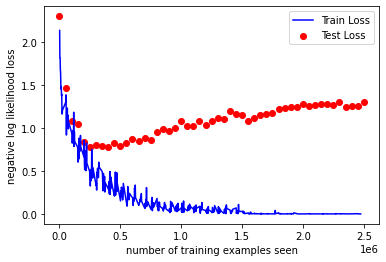

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.plot()

[]

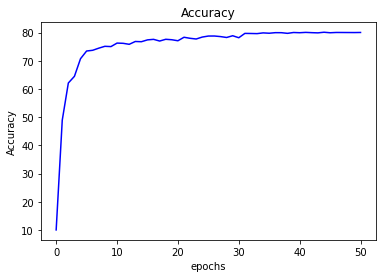

In [13]:
plt.figure()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(accuracy)), accuracy, color = 'blue')
plt.plot()